# Research Question: 

### Should the electric vehicle (EV) industry implement a strategy based on gender factors to boost the growth of EV car sales?

#### To get the answer from the research question, these following steps will be performed.
1.) Cleaned data from csv files in 2022 and 2023

2.) Extract only relevant ev cars and gender records

**For No.3-5, please also refer to the infographic

3.) Compare ev car usage amount to observe whether ev car usage in the area of University of Bath is increasing or decreasing

Data analytic result: Increasing (Please refer to the chart below)

4.) Observe more on gender of ev car drivers in the area of University of Bath (Which gender drives ev car more?)

Data analytic result: Female more than Male which contradicts UK trend (Please refer to the chart below)

5.) Research more on the reasons why men like EV cars which could help EV industry to increase their car selling rate from male customers

# 0. Import all library

In [1]:
import pandas as pd
import os
import glob
import chardet
import codecs
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt


# 1. Clean some specific data file before combine

## 1.1 Clean data file with tick mark data


### Change tick mark to descriptive wording

In [2]:
data = pd.read_csv(os.getcwd()+ '/data2023' + '/22792769.csv', encoding='utf-8')

#rename column to make it more relevant to the data (based on original file)
data.rename(columns={'Unnamed: 0': 'date'}, inplace = True)
data.rename(columns={'Unnamed: 1': 'time'}, inplace = True)
data.rename(columns={'Unnamed: 2': 'direction'}, inplace = True)
data.rename(columns={'Unnamed: 3': 'car'}, inplace = True)
data.rename(columns={'Unnamed: 4': 'bus'}, inplace = True)
data.rename(columns={'Unnamed: 5': 'bicycle'}, inplace = True)
data.rename(columns={'Unnamed: 6': 'motorbike'}, inplace = True)
data.rename(columns={'Unnamed: 7': 'taxi'}, inplace = True)
data.rename(columns={'Unnamed: 8': 'scooter'}, inplace = True)
data.rename(columns={'Unnamed: 9': 'van'}, inplace = True)
data.rename(columns={'Unnamed: 10': 'occupancy'}, inplace = True)
data.rename(columns={'Unnamed: 11': 'driver_male'}, inplace = True)
data.rename(columns={'Unnamed: 12': 'driver_female'}, inplace = True)
data.rename(columns={'Unnamed: 13': 'outsideuniversity_left'}, inplace = True)
data.rename(columns={'Unnamed: 14': 'outsideuniversity_right'}, inplace = True)

#remove row that has no data
for i in data.index:
        if data.loc[i].isna().all() == True:
            data.drop(i, inplace = True)

#remove duplicate column name that came with the original file
for i in data['date'].index:
    if data['date'][i] != '25-10-23':
        data.drop(i, inplace=True)
        
        
#turn tick mark to descriptive wording
for i in data['car'].index:
    if not pd.isna(data['car'][i]):
        data['car'][i] = 'car'
        
for i in data['bus'].index:
    if not pd.isna(data['bus'][i]):
        data['bus'][i] = 'bus'

for i in data['bicycle'].index:
    if not pd.isna(data['bicycle'][i]):
        data['bicycle'][i] = 'bicycle'       
        
for i in data['motorbike'].index:
    if not pd.isna(data['motorbike'][i]):
        data['motorbike'][i] = 'motorbike'
        
for i in data['taxi'].index:
    if not pd.isna(data['taxi'][i]):
        data['taxi'][i] = 'taxi'        
        
for i in data['scooter'].index:
    if not pd.isna(data['scooter'][i]):
        data['scooter'][i] = 'scooter'  
        
for i in data['van'].index:
    if not pd.isna(data['van'][i]):
        data['van'][i] = 'van'       

for i in data['driver_male'].index:
    if not pd.isna(data['driver_male'][i]):
        data['driver_male'][i] = 'male'        
        
for i in data['driver_female'].index:
    if not pd.isna(data['driver_female'][i]):
        data['driver_female'][i] = 'female'  
        
for i in data['outsideuniversity_left'].index:
    if not pd.isna(data['outsideuniversity_left'][i]):
        data['outsideuniversity_left'][i] = 'left'          
        
        
for i in data['outsideuniversity_right'].index:
    if not pd.isna(data['outsideuniversity_right'][i]):
        data['outsideuniversity_right'][i] = 'right'
        

# Save the final result to a new CSV file
output_filename = os.path.join(os.getcwd()+ '/data2023' + '/22792769_.csv')
print(output_filename)
data.to_csv(output_filename, index=False)

print(f"Combined data saved to {output_filename}")

/Users/yingrvk/Applied Data Science/Task 3/data2023/22792769_.csv
Combined data saved to /Users/yingrvk/Applied Data Science/Task 3/data2023/22792769_.csv


###   Combined all relevant columns to a single column

In [3]:
data = pd.read_csv(os.getcwd()+ '/data2023' + '/22792769_.csv', encoding='utf-8')

#combine all vehicle types
data['type1'] = data['car'].combine_first(data['bus'])
data['type2'] = data['type1'].combine_first(data['bicycle'])
data['type3'] = data['type2'].combine_first(data['motorbike'])
data['type4'] = data['type3'].combine_first(data['taxi'])
data['type5'] = data['type4'].combine_first(data['scooter'])
data['type'] = data['type5'].combine_first(data['van'])

data = data.drop('type1', axis=1)
data = data.drop('type2', axis=1)
data = data.drop('type3', axis=1)
data = data.drop('type4', axis=1)
data = data.drop('type5', axis=1)
data = data.drop('car', axis=1)
data = data.drop('bus', axis=1)
data = data.drop('bicycle', axis=1)
data = data.drop('motorbike', axis=1)
data = data.drop('taxi', axis=1)
data = data.drop('scooter', axis=1)
data = data.drop('van', axis=1)

#combine all driver gender
data['driver_gender'] = data['driver_male'].combine_first(data['driver_female'])
data = data.drop('driver_male', axis=1)
data = data.drop('driver_female', axis=1)


#combine all outside university data
data['outsideuniversity'] = data['outsideuniversity_left'].combine_first(data['outsideuniversity_right'])
data = data.drop('outsideuniversity_left', axis=1)
data = data.drop('outsideuniversity_right', axis=1)

print(data)

# Save the final result to a new CSV file
output_filename = os.path.join(os.getcwd()+ '/data2023' + '/22792769_cleaned.csv')
print(output_filename)
data.to_csv(output_filename, index=False)

        date     time direction occupancy type driver_gender outsideuniversity
0   25-10-23  10:30am       OUT         1  car        female             right
1   25-10-23  10:30am       OUT         1  car        female             right
2   25-10-23  10:30am       OUT         1  car          male             right
3   25-10-23  10:30am       OUT       20%  bus          male             right
4   25-10-23  10:31am       OUT       20%  bus          male             right
5   25-10-23  10:31am       OUT         1  car        female              left
6   25-10-23  10:32am       OUT         1  van          male             right
7   25-10-23  10:32am       OUT         1  van          male              left
8   25-10-23  10:33am       OUT         1  car          male             right
9   25-10-23  10:33am       OUT         1  car        female             right
10  25-10-23  10:33am       OUT       30%  bus          male             right
11  25-10-23  10:34am       OUT         2  car      

### Remove original uncleaned tick mark file 
Keep only cleaned file to combine with another csv files in the next step


In [4]:
path1 = os.getcwd()+ '/data2023' + '/22792769_.csv'
path2 = os.getcwd()+ '/data2023' + '/22792769.csv'
if os.path.exists(path1):
    os.remove(path1)

if os.path.exists(path2):
    os.remove(path2)

## 1.2 Swap column name 
to make it more relevant to the data in the column

In [5]:
data = pd.read_csv(os.getcwd()+ '/data2022' + '/22351464.csv', encoding='utf-8')

#swap column name from 'Type' to 'occupancy'
#Also, 'Occupancy' to 'type'
data.rename(columns={'Type': 'occupancy', 'Occupancy': 'type'}, inplace=True)

# Save the final result to a new CSV file
output_filename = os.path.join(os.getcwd()+ '/data2022' + '/22351464_cleaned.csv')
print(output_filename)
data.to_csv(output_filename, index=False)

#Delete the original file
#Keep only cleaned file to combine with another csv files in the next step
path = os.getcwd()+ '/data2022' + '/22351464.csv'

if os.path.exists(path):
    os.remove(path)
    

/Users/yingrvk/Applied Data Science/Task 3/data2022/22351464_cleaned.csv


## 1.3 Rename Column to make it in line with another csv files
For 22351490.csv file

In [6]:
#Read combined data file 
data = pd.read_csv(os.getcwd()+ '/data2022' + '/22351490.csv', encoding='utf-8', low_memory=False)
data.rename(columns={'Data': 'Date'}, inplace=True)

# Save the final result to a new CSV file
output_filename = os.path.join(os.getcwd()+ '/data2022' + '/22351490_cleaned.csv')
print(output_filename)
data.to_csv(output_filename, index=False)

#Delete the original file
#Keep only cleaned file to combine with another csv files in the next step
path = os.getcwd()+ '/data2022' + '/22351490.csv'

if os.path.exists(path):
    os.remove(path)

/Users/yingrvk/Applied Data Science/Task 3/data2022/22351490_cleaned.csv


#### For 22351500.csv file

In [7]:
#Read combined data file 
data = pd.read_csv(os.getcwd()+ '/data2022' + '/22351500.csv', encoding='utf-8', low_memory=False)

data.rename(columns={'6': 'Date'}, inplace=True)

# Save the final result to a new CSV file
output_filename = os.path.join(os.getcwd()+ '/data2022' + '/22351500_cleaned.csv')
print(output_filename)
data.to_csv(output_filename, index=False)

#Delete the original file
#Keep only cleaned file to combine with another csv files in the next step
path = os.getcwd()+ '/data2022' + '/22351500.csv'

if os.path.exists(path):
    os.remove(path)


/Users/yingrvk/Applied Data Science/Task 3/data2022/22351500_cleaned.csv


## 1.4 Remove invalid car occupancy data
As occupancy data for car in '22351440' csv file were all specified in '%', it is ambiguous on exactly numbers of car passenger;

Thus, it is considered as invalid data.

In [8]:
data = pd.read_csv(os.getcwd()+ '/data2022' + '/22351440.csv', encoding='utf-8')

#remove occupancy data for car which specify in %
for i in range(len(data['Occupancy'])): 
    if data.loc[i, 'Type'] == 'car':        
        data.loc[i, 'Occupancy'] = str(data['Occupancy'][i]).replace(str(data['Occupancy'][i]), '')
    
# Save the cleaned data to a new CSV file
output_filename = os.path.join(os.getcwd()+ '/data2022' + '/22351440_cleaned.csv')
print(output_filename)
data.to_csv(output_filename, index=False)

#Delete the original file
#Keep only cleaned file to combine with another csv files in the next step
path = os.getcwd()+ '/data2022' + '/22351440.csv'

if os.path.exists(path):
    os.remove(path)

/Users/yingrvk/Applied Data Science/Task 3/data2022/22351440_cleaned.csv


## 1.5 Fill Missing Data


### 1.5.1) For 2023
As two csv files (22792745.csv and 22792789.csv) have missing date data, fill the data

#### For 22792745.csv

In [9]:
#Read combined data file 
data = pd.read_csv(os.getcwd()+ '/data2023' + '/22792745.csv', encoding='utf-8', low_memory=False)

data['DATE'].fillna('25-10-23', inplace=True)

print(data)

# Save the cleaned data to a new CSV file
output_filename = os.path.join(os.getcwd()+ '/data2023' + '/22792745_cleaned.csv')
print(output_filename)
data.to_csv(output_filename, index=False)

#Delete the original file
#Keep only cleaned file to combine with another csv files in the next step
path = os.getcwd()+ '/data2023' + '/22792745.csv'

if os.path.exists(path):
    os.remove(path)


           DATE   TIME DIRECTION VEHICLE TYPE VEHICLE OCCUPANCY WEATHER
0    25-10-2023  10:30        IN          car                 2  Cloudy
1    25-10-2023  10:30        IN          car                 2  Cloudy
2    25-10-2023  10:30        IN      bicycle                 1  Cloudy
3    25-10-2023  10:30        IN          car                 3  Cloudy
4    25-10-2023  10:30        IN          car                 1  Cloudy
..          ...    ...       ...          ...               ...     ...
216    25-10-23    NaN       NaN          NaN               NaN     NaN
217    25-10-23    NaN       NaN          NaN               NaN     NaN
218    25-10-23    NaN       NaN          NaN               NaN     NaN
219    25-10-23    NaN       NaN          NaN               NaN     NaN
220    25-10-23    NaN       NaN          NaN               NaN     NaN

[221 rows x 6 columns]
/Users/yingrvk/Applied Data Science/Task 3/data2023/22792745_cleaned.csv


#### For 22792789.csv

In [10]:
#Read combined data file 
data = pd.read_csv(os.getcwd()+ '/data2023' + '/22792789.csv', encoding='utf-8', low_memory=False)

data['DATE'].fillna('25-10-23', inplace=True)

print(data)

# Save the cleaned data to a new CSV file
output_filename = os.path.join(os.getcwd()+ '/data2023' + '22792789_cleaned.csv')
print(output_filename)
data.to_csv(output_filename, index=False)

#Delete the original file
#Keep only cleaned file to combine with another csv files in the next step
path = os.getcwd()+ '/data2023' + '/22792789.csv'

if os.path.exists(path):
    os.remove(path)

           DATE   TIME DIRECTION VEHICLE TYPE VEHICLE OCCUPANCY WEATHER
0    25-10-2023  10:30        IN          car                 2  Cloudy
1    25-10-2023  10:30        IN          car                 2  Cloudy
2    25-10-2023  10:30        IN      bicycle                 1  Cloudy
3    25-10-2023  10:30        IN          car                 3  Cloudy
4    25-10-2023  10:30        IN          car                 1  Cloudy
..          ...    ...       ...          ...               ...     ...
216    25-10-23    NaN       NaN          NaN               NaN     NaN
217    25-10-23    NaN       NaN          NaN               NaN     NaN
218    25-10-23    NaN       NaN          NaN               NaN     NaN
219    25-10-23    NaN       NaN          NaN               NaN     NaN
220    25-10-23    NaN       NaN          NaN               NaN     NaN

[221 rows x 6 columns]
/Users/yingrvk/Applied Data Science/Task 3/data202322792789_cleaned.csv


### 1.5.2) For 2022
22351455.csv file have missing date, time, and direction data. Then, fill the data

In [11]:
#Read combined data file 
data = pd.read_csv(os.getcwd()+ '/data2022' + '/22351455.csv', encoding='utf-8', low_memory=False)

#Fill missing date data
data['Date'].fillna('25-10-22', inplace=True)


#Fill missing time data
#Fill time data into the 1-4 rows to make it in line with the prior time record(row 0)
index_time1 = [1, 2, 3, 4]
condition = data.index.isin(index_time1) & data['Time '].str.contains('"')
data.loc[condition, 'Time '] = '10:30'

#Fill time data into the 6-9 rows to make it in line with the prior time record(row 0)
index_time2 = [6,7,8,9]
condition = data.index.isin(index_time2) & data['Time '].str.contains('"')
data.loc[condition, 'Time '] = '10:35'


#Fill time data into the 11-14 rows to make it in line with the prior time record(row 0)
index_time3 = [11,12,13,14]
condition = data.index.isin(index_time3) & data['Time '].str.contains('"')
data.loc[condition, 'Time '] = '10:40'

#Fill time data into the 16-19 rows to make it in line with the prior time record(row 0)
index_time4 = [16,17,18,19]
condition = data.index.isin(index_time4) & data['Time '].str.contains('"')
data.loc[condition, 'Time '] = '10:45'

#Fill time data into the 21-24 rows to make it in line with the prior time record(row 0)
index_time5 = [21,22,23,24]
condition = data.index.isin(index_time5) & data['Time '].str.contains('"')
data.loc[condition, 'Time '] = '10:50'

#Fill time data into the 26-29 rows to make it in line with the prior time record(row 0)
index_time6 = [26,27,28,29]
condition = data.index.isin(index_time6) & data['Time '].str.contains('"')
data.loc[condition, 'Time '] = '10:55'

#Fill time data into the 31-46 rows to make it in line with the prior time record(row 0)
index_time7 = [31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46]
condition = data.index.isin(index_time7) & data['Time '].str.contains('"')
data.loc[condition, 'Time '] = '11:00'


#Fill missing direction data
data['Direction'] = np.where(data['Direction'].str.contains('"'), "IN", data['Direction'])

# Save the cleaned data to a new CSV file
output_filename = os.path.join(os.getcwd()+ '/data2022' + '/22351455_cleaned.csv')
print(output_filename)
data.to_csv(output_filename, index=False)



#Delete the original file
#Keep only cleaned file to combine with another csv files in the next step
path = os.getcwd()+ '/data2022' + '/22351455.csv'

# print(data)

if os.path.exists(path):
    os.remove(path)

/Users/yingrvk/Applied Data Science/Task 3/data2022/22351455_cleaned.csv


#### 1.6) Drop unnamed column which has no data
For 22351444.csv file

In [12]:
#Read combined data file 
data = pd.read_csv(os.getcwd()+ '/data2022' + '/22351444.csv', encoding='utf-8', low_memory=False)

#drop irrelevant column
data = data.drop('Unnamed: 0', axis=1, errors='ignore')

# Save the cleaned data to a new CSV file
output_filename = os.path.join(os.getcwd()+ '/data2022' + '/22351444_cleaned.csv')
print(output_filename)
data.to_csv(output_filename, index=False)

#Delete the original file
#Keep only cleaned file to combine with another csv files in the next step
path = os.getcwd()+ '/data2022' + '/22351444.csv'

# print(data)

if os.path.exists(path):
    os.remove(path)


/Users/yingrvk/Applied Data Science/Task 3/data2022/22351444_cleaned.csv


# 2.) Data Import and Combine (2023)

In [13]:
# specifying the path to csv files
path = os.getcwd() + '/data2023'
  
# csv files in the path 
files = glob.glob(path + "/*.csv") 
content = []

#As csv raw data file has mixed data format, read all files as 'utf-8' format
#If any file can't read as'utf-8' format, then read as latin1 format
        
for i in files:
    try:
        data = pd.read_csv(i, encoding='utf-8', low_memory=False)
    
        # Add the name of each data file in the column
        data['File Name'] = os.path.basename(i)
        
        content.append(data)
        
    except:
        try:
            data = pd.read_csv(i, encoding='latin1', low_memory=False)
            
            # Add the name of each data file in the column
            data['File Name'] = os.path.basename(i)
            
            content.append(data)
            
        except Exception as e_inner:
            print("Error reading file:", i)
            
            continue
          

# Convert column names to lowercase and remove space at the beginning and the end of column name

for i in range(len(content)):
    content[i].columns=content[i].columns.str.lower().str.strip()

# Concatenate all data into one DataFrame
big_df = pd.concat(content, ignore_index=True)


# Save the final result to a new CSV file
big_df.to_csv(os.path.join(os.getcwd()+ '/combined_2023', 'combined_file2023.csv'), index = False)

# 3.) Data Import and Combine (2022)


In [14]:
# specifying the path to csv files
path = os.getcwd() + '/data2022'
  
# csv files in the path 
files = glob.glob(path + "/*.csv") 
content = []

#As csv raw data file has mixed data format, read all files as 'utf-8' format
#If any file can't read as'utf-8' format, then read as latin1 format

for i in files:
    try:
        data = pd.read_csv(i, encoding='utf-8', low_memory=False)
    
        #Add the name of each data file in the column
        data['File Name'] = os.path.basename(i)
        
        content.append(data)
        
    except:
        data = pd.read_csv(i, encoding='latin1', low_memory=False)
        
        #Add the name of each data file in the column
        data['File Name'] = os.path.basename(i)
        print("Error reading file:", i)

        
        content.append(data)

#  Convert column names to lowercase and remove space at the beginning and the end of column name
for i in range(len(content)):
    content[i].columns=content[i].columns.str.lower().str.strip()



# Concatenate all data into one DataFrame
big_df = pd.concat(content, ignore_index=True)

# print(big_df.loc[big_df['file name'] == '22351455_cleaned.csv', :])


# Save the final result to a new CSV file
big_df.to_csv(os.path.join(os.getcwd()+ '/combined_2022', 'combined_file2022.csv'), index = False)



# 4.) Convert Date To The Correct Format
From dd/mm/yyyy to dd-mm-yyyy

### 4.1) For 2023

In [15]:
#Read combined data file 
data = pd.read_csv(os.getcwd()+ '/combined_2023' + '/combined_file2023.csv', encoding='utf-8', low_memory=False)

#Drop column that is irrelevant to date
data = data.drop(np.where(data['date'].str.contains('Disclaimer',na=False))[0],axis=0)

#Change Tuesday, 24 October 2023 to dd-mm-yy format
data['date'] = np.where(data['date'].str.contains('Tuesday, 24 October 2023',na=False),'24-10-23',data['date'])

#Change date data dd-mm-yy format
data['date'] = np.where(data['date'].str.contains('23-10',na=False),'23-10-23',data['date'])
data['date'] = np.where(data['date'].str.contains('24-10',na=False),'24-10-23',data['date'])
data['date'] = np.where(data['date'].str.contains('25-10',na=False),'25-10-23',data['date'])
data['date'] = np.where(data['date'].str.contains('26-10',na=False),'26-10-23',data['date'])
data['date'] = np.where(data['date'].str.contains('27-10',na=False),'27-10-23',data['date'])

#Change format from dd/mm/yyyy to dd-mm-yyyy
data['date'] = np.where(data['date'].str.contains('/'), 
                         pd.to_datetime(data['date'], format='%d/%m/%Y', errors='coerce').dt.strftime('%d-%m-%y'),
                         data['date'])

# ensuring that different date format is resolved
print(data['date'].unique())

# Save cleaned date format data to a new CSV file
data.to_csv(os.path.join(os.getcwd()+ '/combined_2023date', 'combined_file2023_.csv'), index = False)

['23-10-23' '26-10-23' '24-10-23' nan '25-10-23' '27-10-23']


### 4.2) For 2022

In [16]:
#Read combined data file 
data = pd.read_csv(os.getcwd()+ '/combined_2022' + '/combined_file2022.csv', encoding='utf-8', low_memory=False)


#Drop any row that has no record except filename that has data
data = data.dropna(axis=0, how='all', subset=data.columns.difference(['file name']))

#Drop any row that has no record except filename and date that has data
data = data.dropna(axis=0, how='all', subset=data.columns.difference(['file name', 'date']))

#remove space at start/end of each date data and make it lower case
data['date']=data['date'].astype(str).str.strip().str.lower()

#Change 27-Oct to dd-mm-yy format
data['date'] = np.where(data['date'].str.contains('27-oct',na=False),'27-10-22',data['date'])
data['date'] = np.where(data['date'].str.contains('2022-10-25',na=False),'25-10-22',data['date'])

#Change date data dd-mm-yy format
data['date'] = np.where(data['date'].str.contains('24-10',na=False),'24-10-22',data['date'])
data['date'] = np.where(data['date'].str.contains('25-10',na=False),'25-10-22',data['date'])
data['date'] = np.where(data['date'].str.contains('26-10',na=False),'26-10-22',data['date'])
data['date'] = np.where(data['date'].str.contains('27-10',na=False),'27-10-22',data['date'])
data['date'] = np.where(data['date'].str.contains('28-10',na=False),'28-10-22',data['date'])

data['date'] = pd.to_datetime(data['date'], errors='coerce', dayfirst=True)


# ensuring that different date format is resolved
#from checking 
print(data['date'].unique())

#check validity of record which has no date
#from checking, those records have no data which would not be used in the next step
print(data[data['date'].isna()])


# Save cleaned date format data to a new CSV file
data.to_csv(os.path.join(os.getcwd()+ '/combined_2022date', 'combined_file2022_.csv'), index = False)

<DatetimeArray>
['2022-10-25 00:00:00', '2022-10-26 00:00:00', '2022-10-27 00:00:00',
 '2022-10-24 00:00:00', '2022-10-28 00:00:00',                 'NaT']
Length: 6, dtype: datetime64[ns]
        date time direction type occupancy approach/exit additionaldata2  \
1052508  NaT  NaN       NaN  NaN       NaN           NaN             NaN   
1052509  NaT  NaN       NaN  NaN       NaN           NaN             NaN   
1052510  NaT  NaN       NaN  NaN       NaN           NaN             NaN   
1052511  NaT  NaN       NaN  NaN       NaN           NaN             NaN   
1052512  NaT  NaN       NaN  NaN       NaN           NaN             NaN   
1052513  NaT  NaN       NaN  NaN       NaN           NaN             NaN   
1052514  NaT  NaN       NaN  NaN       NaN           NaN             NaN   
1052515  NaT  NaN       NaN  NaN       NaN           NaN             NaN   
1052516  NaT  NaN       NaN  NaN       NaN           NaN             NaN   
1052517  NaT  NaN       NaN  NaN       NaN         

/var/folders/5d/fnt3vm9x4g12xkgwc_94_nc00000gn/T/ipykernel_86831/3452412246.py:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['date'], errors='coerce', dayfirst=True)


# 5.) Select only focusing columns (related to EV cars and driver gender)

### 5.1) For 2023

In [19]:
# read combined data file 
data = pd.read_csv(os.getcwd()+ '/combined_2023date' + '/combined_file2023_.csv', encoding='utf-8', low_memory=False)

selected_col = data[['file name', 'date', 'time', 'type', 'occupancy',
                     'color', 'public/private', 'fuel type', 'is electric', 
                     'brand name', 'colour','type of vehicle', 'electric', 
                     'vehicle type', 'vehicle occupancy', 'brand', 
                     'green vehicle', 'eco-friendly', 'vehicle brand', 'ev', 
                     'car brand', 'hasgreennumberplate', 'ecofriendly', 
                     'is_env_fr', 'zero emissions', 'low emissions compliant', 
                     'make', 'green badge', 'vehicle_type', 'zero emission',
                     'ageidentifier', 'age identifier','age_id','driver gender','driver_gender',
                     'male','female']]


selected_col.to_csv(os.path.join(os.getcwd()+ '/combined_2023date', 'combined_file2023.csv'), index = False)

### 5.2) For 2022

In [20]:
data = pd.read_csv(os.getcwd()+ '/combined_2022date' + '/combined_file2022_.csv', encoding='utf-8', low_memory=False)

selected_col = data[['file name', 'date', 'time', 'type', 'occupancy',
                     'electric or not', 'electric vehicle', 'electric or hybrid?', 
                     'occupancy of the vehicle', 'vehicle colour', 'electric', 
                     'electric_vehicle', 'time ( in am)','type of vehicle', 
                     'colour of vehicle', 'not_petrol', 'electric / non-electric vehicle', 
                     'fuel', 'eco-friendly', 'brand', 'vehicle type', 
                     'vehicle brand', 'colour', 'age identifier', 'vehicle age','engine type',
                     'driver\'s gender','gender of the driver','gender', 
                     'gender of driver','driver gender']]


selected_col.to_csv(os.path.join(os.getcwd()+ '/combined_2022date', 'combined_file2022.csv'), index = False)

# 6.) Remove duplicate columns

### Some columns have different name but contain similar data
### Then, combined those data into a single column

#e.g. 'type' column &'vehicle type' column


#change 'vehicle type' column name as 'type' and 
combined data in the single 'type' column

### 6.1) For 2023

In [21]:
path = os.getcwd()+ '/combined_2023'
data = pd.read_csv(os.getcwd()+ '/combined_2023date' + '/combined_file2023.csv', encoding='utf-8', low_memory=False)

# combined all color data
data['z_color'] = data['color'].combine_first(data['colour'])

data = data.drop('color', axis=1)
data = data.drop('colour', axis=1)

# combined all occupancy data
data['z_occupancy'] = data['vehicle occupancy'].combine_first(data['occupancy'])

data = data.drop('vehicle occupancy', axis=1)
data = data.drop('occupancy', axis=1)


# combined all vehicle type data
data['z_type1'] = data['type'].combine_first(data['type of vehicle'])
data['z_type2'] = data['z_type1'].combine_first(data['vehicle type'])
data['z_type'] = data['z_type2'].combine_first(data['vehicle_type'])


data = data.drop('type', axis=1)
data = data.drop('type of vehicle', axis=1)
data = data.drop('vehicle type', axis=1)
data = data.drop('vehicle_type', axis=1)
data = data.drop('z_type1', axis=1)
data = data.drop('z_type2', axis=1)


# combined all brand data
data['z_brand1'] = data['brand name'].combine_first(data['car brand'])
data['z_brand2'] = data['z_brand1'].combine_first(data['vehicle brand'])
data['z_brand3'] = data['z_brand2'].combine_first(data['brand'])
data['z_brand'] = data['z_brand3'].combine_first(data['make'])

data = data.drop('brand name', axis=1)
data = data.drop('car brand', axis=1)
data = data.drop('vehicle brand', axis=1)
data = data.drop('brand', axis=1)
data = data.drop('make', axis=1)
data = data.drop('z_brand1', axis=1)
data = data.drop('z_brand2', axis=1)
data = data.drop('z_brand3', axis=1)


# combined all green vehicle data
data['z_electric1'] = data['eco-friendly'].combine_first(data['is electric'])
data['z_electric2'] = data['z_electric1'].combine_first(data['electric'])
data['z_electric3'] = data['z_electric2'].combine_first(data['green vehicle'])
data['z_electric4'] = data['z_electric3'].combine_first(data['ev'])
data['z_electric5'] = data['z_electric4'].combine_first(data['ecofriendly'])
data['z_electric6'] = data['z_electric5'].combine_first(data['is_env_fr'])
data['z_electric7'] = data['z_electric6'].combine_first(data['zero emissions'])
data['z_electric8'] = data['z_electric7'].combine_first(data['zero emission'])
data['z_electric9'] = data['z_electric8'].combine_first(data['hasgreennumberplate'])
data['z_electric10'] = data['z_electric9'].combine_first(data['green badge'])
data['z_electric11'] = data['z_electric10'].combine_first(data['low emissions compliant'])
data['z_electric'] = data['z_electric11'].combine_first(data['fuel type'])

#combined all age identifier data
data['z_ageidentifier1'] = data['age identifier'].combine_first(data['ageidentifier'])
data['z_ageidentifier'] = data['z_ageidentifier1'].combine_first(data['age_id'])

#combined all driver gender data
data['z_drivergender1'] = data['driver_gender'].combine_first(data['male'])
data['z_drivergender2'] = data['z_drivergender1'].combine_first(data['female'])
data['z_drivergender'] = data['z_drivergender2'].combine_first(data['driver gender'])


#drop all driver gender columns apart from the combined column
data = data.drop('driver_gender', axis=1)
data = data.drop('male', axis=1)
data = data.drop('female', axis=1)
data = data.drop('z_drivergender1', axis=1)
data = data.drop('z_drivergender2', axis=1)

#drop all age identifier columns apart from the combined column
data = data.drop('z_ageidentifier1', axis=1)
data = data.drop('age identifier', axis=1)
data = data.drop('ageidentifier', axis=1)
data = data.drop('age_id', axis=1)

#drop all electric vehicle columns apart from the combined column
data = data.drop('eco-friendly', axis=1)
data = data.drop('is electric', axis=1)
data = data.drop('electric', axis=1)
data = data.drop('green vehicle', axis=1)
data = data.drop('ev', axis=1)
data = data.drop('ecofriendly', axis=1)
data = data.drop('is_env_fr', axis=1)
data = data.drop('z_electric1', axis=1)
data = data.drop('z_electric2', axis=1)
data = data.drop('z_electric3', axis=1)
data = data.drop('z_electric4', axis=1)
data = data.drop('z_electric5', axis=1)
data = data.drop('z_electric6', axis=1)
data = data.drop('z_electric7', axis=1)
data = data.drop('z_electric8', axis=1)
data = data.drop('z_electric9', axis=1)
data = data.drop('z_electric10', axis=1)
data = data.drop('z_electric11', axis=1)
data = data.drop('zero emission', axis=1)
data = data.drop('zero emissions', axis=1)
data = data.drop('fuel type', axis=1)
data = data.drop('green badge', axis=1)
data = data.drop('hasgreennumberplate', axis=1)
data = data.drop('low emissions compliant', axis=1)
        
data.to_csv(os.path.join(os.getcwd()+ '/combined_2023date', 'combined_file2023_cleaned.csv'), index = False)

### 6.2) For 2022

In [22]:
data = pd.read_csv(os.getcwd()+ '/combined_2022date' + '/combined_file2022.csv', encoding='utf-8', low_memory=False)

# combined all color data
data['z_color1'] = data['colour of vehicle'].combine_first(data['colour'])
data['z_color'] = data['z_color1'].combine_first(data['vehicle colour'])

#drop all color columns apart from the combined column
data = data.drop('z_color1', axis=1)
data = data.drop('colour of vehicle', axis=1)
data = data.drop('colour', axis=1)
data = data.drop('vehicle colour', axis=1)


# combined all occupancy data
data['z_occupancy'] = data['occupancy of the vehicle'].combine_first(data['occupancy'])

#drop all occupancy columns apart from the combined column
data = data.drop('occupancy of the vehicle', axis=1)
data = data.drop('occupancy', axis=1)

# combined all time data
data['z_time'] = data['time ( in am)'].combine_first(data['time'])

#drop all time columns apart from the combined column
data = data.drop('time ( in am)', axis=1)
data = data.drop('time', axis=1)

# combined all vehicle type data
data['z_type1'] = data['type'].combine_first(data['type of vehicle'])
data['z_type'] = data['z_type1'].combine_first(data['vehicle type'])

#drop all vehicle type apart from the combined column
data = data.drop('z_type1', axis=1)
data = data.drop('type', axis=1)
data = data.drop('type of vehicle', axis=1)
data = data.drop('vehicle type', axis=1)


# combined all brand data
data['z_brand'] = data['brand'].combine_first(data['vehicle brand'])

#drop all brand columns apart from the combined column
data = data.drop('brand', axis=1)
data = data.drop('vehicle brand', axis=1)

# combined all age identifier data
data['z_ageidentifier'] = data['vehicle age'].combine_first(data['age identifier'])

#drop all age identifier columns apart from the combined column
data = data.drop('vehicle age', axis=1)
data = data.drop('age identifier', axis=1)


# combined all green vehicle data
data['z_ev1'] = data['electric or not'].combine_first(data['electric vehicle'])
data['z_ev2'] = data['z_ev1'].combine_first(data['electric or hybrid?'])
data['z_ev3'] = data['z_ev2'].combine_first(data['electric'])
data['z_ev4'] = data['z_ev3'].combine_first(data['electric_vehicle'])
data['z_ev5'] = data['z_ev4'].combine_first(data['not_petrol'])
data['z_ev6'] = data['z_ev5'].combine_first(data['electric / non-electric vehicle'])
data['z_ev7'] = data['z_ev6'].combine_first(data['fuel'])
data['z_ev8'] = data['z_ev7'].combine_first(data['eco-friendly'])
data['z_ev'] = data['z_ev8'].combine_first(data['engine type'])

# combined all driver's gender data
data['z_drivergender1'] = data['driver gender'].combine_first(data['driver\'s gender'])
data['z_drivergender2'] = data['z_drivergender1'].combine_first(data['gender of the driver'])
data['z_drivergender3'] = data['z_drivergender2'].combine_first(data['gender'])
data['z_drivergender'] = data['z_drivergender3'].combine_first(data['gender of driver'])

#drop all driver gender columns apart from the combined column
data = data.drop('z_drivergender1', axis=1)
data = data.drop('z_drivergender2', axis=1)
data = data.drop('z_drivergender3', axis=1)
data = data.drop('driver\'s gender', axis=1)
data = data.drop('gender', axis=1)
data = data.drop('gender of the driver', axis=1)
data = data.drop('gender of driver', axis=1)
data = data.drop('driver gender', axis=1)

#drop all electric vehicle columns apart from the combined column
data = data.drop('z_ev1', axis=1)
data = data.drop('z_ev2', axis=1)
data = data.drop('z_ev3', axis=1)
data = data.drop('z_ev4', axis=1)
data = data.drop('z_ev5', axis=1)
data = data.drop('z_ev6', axis=1)
data = data.drop('z_ev7', axis=1)
data = data.drop('z_ev8', axis=1)
data = data.drop('electric or not', axis=1)
data = data.drop('electric vehicle', axis=1)
data = data.drop('electric or hybrid?', axis=1)
data = data.drop('electric', axis=1)
data = data.drop('electric_vehicle', axis=1)
data = data.drop('not_petrol', axis=1)
data = data.drop('electric / non-electric vehicle', axis=1)
data = data.drop('fuel', axis=1)
data = data.drop('eco-friendly', axis=1)
data = data.drop('engine type', axis=1)

data.to_csv(os.path.join(os.getcwd()+ '/combined_2022date', 'combined_file2022_cleaned.csv'), index = False)

## 7. Make all data in the same column to be in the same format

#### 7.1 Time Column

In [23]:
#for 2023
data23 = pd.read_csv(os.getcwd()+ '/combined_2023date' + '/combined_file2023_cleaned.csv', encoding='utf-8', low_memory=False)

data23['time']=data23['time'].str.lower()

for i in range(len(data23['time'])): 
    
    #remove leading 0
    data23.loc[i, 'time'] = str(data23['time'][i]).lstrip('0')
    

    #remove all space
    data23.loc[i, 'time'] = str(data23['time'][i]).replace(' ', '')

    
    #separate hh and mm by : instead of .
    if '.' in data23['time'][i]:
        data23.loc[i, 'time'] = data23['time'][i].replace('.', ':')

    #remove ss from hh:mm:ss format
    elif len(data23['time'][i]) > 7:
        data23.loc[i, 'time'] = data23['time'][i][:5] +'am'

    
    #add am at the end if hour = 1 - 9
    elif len(data23['time'][i]) == 4:
        data23.loc[i, 'time'] = data23['time'][i][:] +'am'
    
    #add am at the end if hour = 10 - 13
    elif len(data23['time'][i]) == 5:
        data23.loc[i, 'time'] = data23['time'][i][:] +'am'

# ensuring that different time formats are resolved
print(data23['time'].unique())

#save all data with the same time format to the new file
data23.to_csv(os.path.join(os.getcwd()+ '/combined_2023date', 'combined_file2023_cleaned1.csv'), index = False)



['10:30am' '10:35am' '10:40am' '10:45am' '10:50am' '10:55am' '11:00am'
 '11:05am' '10:05am' '10:10am' '10:15am' '10:20am' '10:25am' 'nan'
 '9:30am' '9:35am' '9:40am' '9:45am' '9:50am' '9:55am' '10:00am' '10:01am'
 '10:02am' '10:04am' '10:06am' '10:07am' '10:08am' '10:09am' '10:11am'
 '10:12am' '10:13am' '10:14am' '10:16am' '10:17am' '10:18am' '10:19am'
 '10:21am' '10:22am' '10:23am' '10:24am' '10:26am' '10:27am' '10:28am'
 '9:31am' '9:32am' '9:34am' '9:37am' '9:38am' '9:39am' '9:41am' '9:42am'
 '9:43am' '9:46am' '9:48am' '9:49am' '9:51am' '9:52am' '9:53am' '9:54am'
 '9:56am' '9:57am' '9:58am' '9:59am' '11:53am' '11:54am' '11:55am'
 '11:56am' '11:57am' '11:58am' '11:59am' '12:00am' '12:01am' '12:03pm'
 '11:40am' '11:41am' '11:43am' '11:44am' '11:46am' '11:47am' '11:48am'
 '11:49am' '11:50am' '11:51am' '11:52am' '11:42am' '11:45am' '12:00pm'
 '12:01pm' '12:02pm' '12:04pm' '12:05pm' '12:06pm' '9:00am' '9:05am'
 '9:10am' '9:15am' '9:20am' '9:25am' '10:32am' '10:33am' '10:34am'
 '10:36am' '

In [24]:
#for 2022
data22 = pd.read_csv(os.getcwd()+ '/combined_2022date' + '/combined_file2022_cleaned.csv', encoding='utf-8', low_memory=False)

data22['z_time']=data22['z_time'].str.lower()

for i in range(len(data22['z_time'])): 
    
    #remove leading 0
    data22.loc[i, 'z_time'] = str(data22['z_time'][i]).lstrip('0')

    #remove all space
    data22.loc[i, 'z_time'] = str(data22['z_time'][i]).replace(' ', '')

    #separate hh and mm by : instead of .
    if '.' in data22['z_time'][i]:
        data22.loc[i, 'z_time'] = data22['z_time'][i].replace('.', ':')

    #remove ss from hh:mm:ss format
    if len(data22['z_time'][i]) > 7:
        data22.loc[i, 'z_time'] = data22['z_time'][i][:5] +'am'

    
    #add am at the end if hour = 1 - 9
    if len(data22['z_time'][i]) == 4:
        data22.loc[i, 'z_time'] = data22['z_time'][i][:] +'am'

    
    #add am at the end if hour = 10 - 13
    if len(data22['z_time'][i]) == 5:
        data22.loc[i, 'z_time'] = data22['z_time'][i][:] +'am'


# ensuring that different time formats are resolved
print(data22['z_time'].unique())

#save all data with the same time format to the new file
data22.to_csv(os.path.join(os.getcwd()+ '/combined_2022date', 'combined_file2022_cleaned1.csv'), index = False)


['10:30am' '10:35am' '10:40am' '10:45am' '10:50am' '10:55am' '11:00am'
 '10:20am' '10:25am' '10:31am' '10:32am' '10:33am' '10:34am' '10:36am'
 '10:37am' '10:39am' '10:41am' '10:42am' '10:43am' '10:44am' '10:46am'
 '10:47am' '10:48am' '10:49am' '10:51am' '10:53am' '10:54am' '10:56am'
 '10:57am' '10:00am' '10:05am' '10:10am' '10:15am' '10:21am' '10:22am'
 '10:23am' '10:24am' '10:26am' '10:27am' '10:28am' '10:29am' '10:38am'
 '10:52am' '11:02am' '11:07am' '11:12am' '11:17am' '11:22am' '10:58am'
 '8:30am' '8:35am' '8:40am' '8:45am' '8:50am' '8:55am' '9:00am' '10:59am'
 '11:05am' '11:10am' '9:01am' '9:06am' '9:11am' '9:16am' '9:21am' '9:26am'
 '9:20am' '9:25am' '9:30am' '9:35am' '9:40am' '9:45am' '9:50am' '11:01am'
 '9:23am' '9:24am' '9:27am' '9:28am' '9:29am' '9:31am' '9:32am' '9:33am'
 '9:34am' '9:36am' '9:37am' '9:38am' '9:39am' '9:41am' '9:42am' '9:43am'
 '9:44am' '9:46am' '9:47am' '9:48am' '9:49am' '9:51am' '9:52am' '9:53am'
 '9:54am' '9:56am' '9:57am' '9:58am' '9:59am' '2:39pm' '2:40p

###  7.2 Color column
- remove invalid data
- make all data to be in the same format

In [25]:
#For 2023
data23 = pd.read_csv(os.getcwd()+ '/combined_2023date' + '/combined_file2023_cleaned1.csv', low_memory=False)

data23['z_color']=data23['z_color'].str.lower()


#remove invalid data
for i in range(len(data23['z_color'])): 
    if str(data23['z_color'][i])[0].isdigit():
        data23.loc[i, 'z_color'] = str(data23['z_color'][i]).replace(str(data23['z_color'][i][0]), '')
            
    #remove invalid data (it is ambiguous which color 't', 'n', and 'p' stand for)
    elif str(data23['z_color'][i]) == 't' or str(data23['z_color'][i]) == 'n' or str(data23['z_color'][i]) == 'p':
            data23.loc[i, 'z_color'] = str(data23['z_color'][i]).replace(str(data23['z_color'][i][0]), '')

            
    #remove invalid data (could not specify color which described as 'other')
    elif str(data23['z_color'][i]) == 'other':
        data23.loc[i, 'z_color'] = str(data23['z_color'][i]).replace(str(data23['z_color'][i]), '')
            
    #make white color to be in the same data format e.g. 'w' to 'white'
    elif str(data23['z_color'][i]) == 'w':
        data23.loc[i, 'z_color'] = str(data23['z_color'][i]).replace('w', 'white')

    #make yellow color to be in the same data format e.g. 'y' to 'yellow'
    elif str(data23['z_color'][i]) == 'y':
        data23.loc[i, 'z_color'] = str(data23['z_color'][i]).replace('y', 'yellow')
            
    #remove invalid data (gr can be both represent as 'green' and 'grey')
    elif str(data23['z_color'][i]) == 'gr':
        data23.loc[i, 'z_color'] = str(data23['z_color'][i]).replace('gr', '')
    
    #remove invalid data (g can be both represent as 'green' and 'grey')
    elif str(data23['z_color'][i]) == 'g':
        data23.loc[i, 'z_color'] = str(data23['z_color'][i]).replace('g', '')

    #make red color to be in the same data format e.g. 'r' to 'red'
    elif str(data23['z_color'][i]) == 'r':
        data23.loc[i, 'z_color'] = str(data23['z_color'][i]).replace('r', 'red')
    
    #remove invalid data (bl can be both represent as 'black' and 'blue')
    elif str(data23['z_color'][i]) == 'bl':
        data23.loc[i, 'z_color'] = str(data23['z_color'][i]).replace('bl', '')
   
            
    #remove invalid data (b can be both represent as 'black' and 'blue')
    elif str(data23['z_color'][i]) == 'b':
        data23.loc[i, 'z_color'] = str(data23['z_color'][i]).replace('b', '')
            
    #make brown color to be in the same data format e.g. 'br' to 'brown'
    elif str(data23['z_color'][i]) == 'br':
        data23.loc[i, 'z_color'] = str(data23['z_color'][i]).replace('br', 'brown')
            
    #make silver color to be in the same data format e.g. 'sl' to 'silver'
    elif str(data23['z_color'][i]) == 'sl':
        data23.loc[i, 'z_color'] = str(data23['z_color'][i]).replace('sl', 'silver')
            
    #make silver color to be in the same data format e.g. 's' to 'silver'
    elif str(data23['z_color'][i]) == 's':
        data23.loc[i, 'z_color'] = str(data23['z_color'][i]).replace('s', 'silver')
        
print(data23['z_color'].unique())

            
#save all data with the same color format to the new file
data23.to_csv(os.path.join(os.getcwd()+ '/combined_2023date', 'combined_file2023_cleaned2.csv'), index = False)


#For2022

data22 = pd.read_csv(os.getcwd()+ '/combined_2022date' + '/combined_file2022_cleaned1.csv', low_memory=False)

data22['z_color']=data22['z_color'].str.lower()

print(data22['z_color'].unique())

#change 'gray' spelling to 'grey' (make it to be the same format)
for i in range(len(data22['z_color'])): 
    if str(data22['z_color'][i]) == 'gray':
        data22.loc[i, 'z_color'] = str(data22['z_color'][i]).replace('gray', 'grey')
        
#save all data with the same time format to the new file
data22.to_csv(os.path.join(os.getcwd()+ '/combined_2022date', 'combined_file2022_cleaned2.csv'), index = False)

['grey' '' 'white' nan 'black' 'blue' 'red' 'silver' 'yellow' 'brown'
 'orange' 'green' 'maroon' 'purple' 'pink' 'indigo' 'cream']
[nan 'black' 'green' 'red' 'blue' 'white' 'orange' 'grey' 'purple'
 'yellow' 'brown' 'gray']


### 7.3 Occupancy column

In [26]:
data22 = pd.read_csv(os.getcwd()+ '/combined_2022date' + '/combined_file2022_cleaned2.csv', low_memory=False)
data23 = pd.read_csv(os.getcwd()+ '/combined_2023date' + '/combined_file2023_cleaned2.csv', low_memory=False)

for i in range(len(data23['z_occupancy'])): 
    #remove space
    data23.loc[i, 'z_occupancy'] = str(data23['z_occupancy'][i]).replace(' ', '')
    
    #if occupancy is specified as '%' for car type, it is considered as invalid data
    #Thus, removed it
    if data23.loc[i, 'z_type'] == 'car' and data23.loc[i, 'z_occupancy'][-1] == '%':
        data23.loc[i, 'z_occupancy'] = str(data23['z_occupancy'][i]).replace(data23['z_occupancy'][i], '')

#check if any car type still has occupancy in % data format    
print(data23['z_occupancy'][data23['z_type'] == 'car'].unique())


for i in range(len(data22['z_occupancy'])): 
    #remove space
    data22.loc[i, 'z_occupancy'] = str(data22['z_occupancy'][i]).replace(' ', '')

#save all data with the same occupancy format to the new file
data22.to_csv(os.path.join(os.getcwd()+ '/combined_2022date', 'combined_file2022_cleaned3.csv'), index = False)
data23.to_csv(os.path.join(os.getcwd()+ '/combined_2023date', 'combined_file2023_cleaned3.csv'), index = False)

['20' '40' '10' '50' '1' '2' '4' '3' '5' '']


### 7.4 Vehicle Type column

In [27]:
data22 = pd.read_csv(os.getcwd()+ '/combined_2022date' + '/combined_file2022_cleaned3.csv', low_memory=False)
data23 = pd.read_csv(os.getcwd()+ '/combined_2023date' + '/combined_file2023_cleaned3.csv', low_memory=False)

data22['z_type']=data22['z_type'].str.lower()
data23['z_type']=data23['z_type'].str.lower()

for i in range(len(data23['z_type'])): 
    #remove space
    data23.loc[i, 'z_type'] = str(data23['z_type'][i]).replace(' ', '')

    #make all data to be the same data format
    #considered u2 as bus
    if str(data23['z_type'][i]) in ['u2', 'doubledeckerbus', 'singledeckerbus', 'bu']:
        data23.loc[i, 'z_type'] = 'bus'

    #make motorbike vehicle type to be in the same data format
    elif str(data23['z_type'][i]) in ['moterbike', 'm', 'motor', 'motorcycle']:
        data23.loc[i, 'z_type'] = 'motorbike'

    #make bike vehicle type to be in the same data format
    elif str(data23['z_type'][i]) in ['bi', 'bike']:
        data23.loc[i, 'z_type'] = 'bicycle'
        
    #make van vehicle type to be in the same data format        
    elif str(data23['z_type'][i]) in ['v']:
        data23.loc[i, 'z_type'] = 'van'
        
    #make lorry vehicle type to be in the same data format
    elif str(data23['z_type'][i]) in ['l']:
        data23.loc[i, 'z_type'] = 'lorry'

    #make truck vehicle type to be in the same data format        
    elif str(data23['z_type'][i]) in ['t', 'minitruck']:
        data23.loc[i, 'z_type'] = 'truck'

    #make car vehicle type to be in the same data format        
    elif str(data23['z_type'][i]) in ['c']:
        data23.loc[i, 'z_type'] = 'car'

    #make scooter vehicle type to be in the same data format        
    elif str(data23['z_type'][i]) in ['s']:
        data23.loc[i, 'z_type'] = 'scooter'
        
    #remove invalid data (could not specify vehicle type which described as 'authorisedvehicle' or 'other')
    elif str(data23['z_type'][i]) in ['authorisedvehicle','a.v', 'other']:
        data23.loc[i, 'z_type'] = ''

print(data23['z_type'].unique())

for i in range(len(data22['z_type'])): 
    #remove space
    data22.loc[i, 'z_type'] = str(data22['z_type'][i]).replace(' ', '')
    
    #make scooter vehicle type to be in the same data format
    if str(data22['z_type'][i]) in ['e-scooter', 'escooter', 'scooters']:
        data22.loc[i, 'z_type'] = 'scooter'

    #make motorbike vehicle type to be in the same data format
    elif str(data22['z_type'][i]) in ['moto', 'moterbike', 'motorcycle']:
        data22.loc[i, 'z_type'] = 'motorbike'
        
    #make car vehicle type to be in the same data format 
    elif str(data22['z_type'][i]) in ['electriccar']:
        data22.loc[i, 'z_type'] = 'car'

    #remove ambiguous data (could not specify whether 'bike' represent motorbike or bicycle)
    #remove invalid data (could not specify vehicle type which described as 'authorisedvehicle' or 'other')
    elif str(data22['z_type'][i]) in ['bike', 'electricbike', 'other']:
        data22.loc[i, 'z_type'] = ''

    #remove invalid data (do not need data of pedestrian type)
    elif str(data22['z_type'][i]) in ['pedestrian']:
        data22.loc[i, 'z_type'] = ''

        
    #remove invalid data (do not need data of tractor type)
    elif str(data22['z_type'][i]) in ['tractor']:
        data22.loc[i, 'z_type'] = ''
        
print(data22['z_type'].unique())


#save all data with the same vehicle type format to the new file
data22.to_csv(os.path.join(os.getcwd()+ '/combined_2022date', 'combined_file2022_cleaned4.csv'), index = False)
data23.to_csv(os.path.join(os.getcwd()+ '/combined_2023date', 'combined_file2023_cleaned4.csv'), index = False)

['car' 'van' 'bus' 'bicycle' 'lorry' 'taxi' 'motorbike' 'truck' 'nan'
 'scooter' '']
['car' 'van' 'taxi' 'bus' 'bicycle' 'motorbike' 'scooter' 'lorry' '' 'nan'
 'truck']


### 7.5 Brand column

In [28]:
data22 = pd.read_csv(os.getcwd()+ '/combined_2022date' + '/combined_file2022_cleaned4.csv')
data23 = pd.read_csv(os.getcwd()+ '/combined_2023date' + '/combined_file2023_cleaned4.csv')

data22['z_brand']=data22['z_brand'].str.lower()
data23['z_brand']=data23['z_brand'].str.lower()



for i in range(len(data22['z_brand'])): 
    
    #remove space    
    data22.loc[i, 'z_brand'] = str(data22['z_brand'][i]).replace(' ', '')
    
    #make mercedes benz brand to be in the same data format
    if str(data22['z_brand'][i]) in ['mercedesbenz', 'mercedesa180d']:
        data22.loc[i, 'z_brand'] = 'benz'
        
    #make volkswagen brand to be in the same data format
    elif str(data22['z_brand'][i]) in ['vw', 'volkswagengolf', 'volkswagenpolo']:
        data22.loc[i, 'z_brand'] = 'volkswagen'
        
    #correct typo
    elif str(data22['z_brand'][i]) in ['pegout', 'peugeotexport']:
        data22.loc[i, 'z_brand'] = 'puegeot'  
        
    elif str(data22['z_brand'][i]) in ['toyotara4']:
        data22.loc[i, 'z_brand'] = 'toyota'
        
    #rangerover is one of the model of landrover brand; thus, keep the 'landrover' brand data instead
    elif str(data22['z_brand'][i]) in ['rangerover']:
        data22.loc[i, 'z_brand'] = 'landrover'  
    elif str(data22['z_brand'][i]) in ['citoren']:
        data22.loc[i, 'z_brand'] = 'citroen'  
        
    elif str(data22['z_brand'][i]) in ['volvoxc40']:
        data22.loc[i, 'z_brand'] = 'volvo' 
        
    elif str(data22['z_brand'][i]) in ['renaultzoe', 'renaulttraffic']:
        data22.loc[i, 'z_brand'] = 'renault'         
    elif str(data22['z_brand'][i]) in ['audiq5', 'audia6', 'audiq2']:
        data22.loc[i, 'z_brand'] = 'audi'         
        
        
    #remove ambiguous data (could not specify whether 'bike' represent motorbike or bicycle)
    #remove invalid data (could not specify vehicle type which described as 'authorisedvehicle' or 'other')
    elif str(data22['z_brand'][i]) in ['other']:
        data22.loc[i, 'z_brand'] = ''
    

for i in range(len(data23['z_brand'])):
    
    #remove space    
    data23.loc[i, 'z_brand'] = str(data23['z_brand'][i]).replace(' ', '')
    
    #correct typo
    if str(data23['z_brand'][i]) in ['hundai']:
        data23.loc[i, 'z_brand'] = 'hyundai'
        
    elif str(data23['z_brand'][i]) in ['mercedes', 'mercedesbenz', 'mercedes-benz', 'mercedes']:
        data23.loc[i, 'z_brand'] = 'benz'

    elif str(data23['z_brand'][i]) in ['citroën']:
        data23.loc[i, 'z_brand'] = 'citroen'
    

   #correct typo    
    elif str(data23['z_brand'][i]) in ['volksvaken', 'volkswagon', 'volkswaken']:
        data23.loc[i, 'z_brand'] = 'volkswaken'  

   #correct typo    
    elif str(data23['z_brand'][i]) in ['mitsubshi']:
        data23.loc[i, 'z_brand'] = 'mitsubishi'
        
   #correct typo    
    elif str(data23['z_brand'][i]) in ['vauxhaul']:
        data23.loc[i, 'z_brand'] = 'vauxhall' 
        
    #rangerover is one of the model of landrover brand; thus, keep the 'landrover' brand data instead
    elif str(data23['z_brand'][i]) in ['rangerover']:
        data23.loc[i, 'z_brand'] = 'landrover'  
        
    #remove ambiguous data
    elif str(data23['z_brand'][i]) in ['20', 'other', 'japanesebrand']:
        data23.loc[i, 'z_brand'] = ''
        
print(data22['z_brand'].unique())
print(data23['z_brand'].unique())

        
#save all data with the same brand format to the new file
data22.to_csv(os.path.join(os.getcwd()+ '/combined_2022date', 'combined_file2022_cleaned5.csv'), index = False)
data23.to_csv(os.path.join(os.getcwd()+ '/combined_2023date', 'combined_file2023_cleaned5.csv'), index = False)

['nan' 'ford' 'mini' 'honda' 'bmw' 'peugeot' 'fiat' 'seat' 'hyundai' 'kia'
 'audi' 'nissan' 'volkswagen' 'renault' 'toyota' 'landrover' 'citroen'
 'mitsubishi' 'benz' 'jaguar' 'opel' 'mg' 'skoda' 'suzuki' 'firstbus'
 'fordtransit' 'swift' 'opelcorsa' 'puegeot' 'sandero' 'minicooper'
 'accord' 'tiguan' 'volvo' 'voi' 'crv' 'triumph' 'cube' 'tesla' 'scania'
 'porsche' 'dhl' 'kelberg' 'gant' 'mercedes' 'unibus' '' 'daf']
['nan' 'aquae' 'specialized' 'honda' 'benz' 'hyundai' 'toyota' 'renault'
 'skoda' 'citroen' 'vauxhall' 'jeep' 'kia' 'bmw' 'volkswaken' 'trek'
 'fiat' 'peugeot' 'wessexconnect' 'nissan' 'yamaha' 'bentley' 'mazda'
 'audi' 'canyon' 'ford' 'seat' 'landrover' 'volvo' 'mitsubishi' 'wessex'
 'firstgroup' 'volkswagen' 'tesla' 'minicooper' 'scania' 'lexus' 'mini'
 'subaru' 'astonmatin' 'suzuki' 'mg' 'dacia' 'fiesta' '' 'campagna' 'daf'
 'null' 'porsche' 'pegout' 'royalenfield' 'citreon' 'bwm' 'jaguar'
 'puegeot']


### 7.6 EV car column

In [29]:
data22 = pd.read_csv(os.getcwd()+ '/combined_2022date' + '/combined_file2022_cleaned5.csv')
data23 = pd.read_csv(os.getcwd()+ '/combined_2023date' + '/combined_file2023_cleaned5.csv')

data22['z_ev']=data22['z_ev'].str.lower()
data23['z_electric']=data23['z_electric'].str.lower()


for i in range(len(data23['z_electric'])): 
    
    #remove space
    data23.loc[i, 'z_electric'] = str(data23['z_electric'][i]).replace(' ', '')
    
    #considered conventional, ICE, n, 0, 0.0, nonev as non electric vehicle
    if str(data23['z_electric'][i]) in ['conventional', 'ice' ,'n', '0', '0.0', 'nonev']:
        data23.loc[i, 'z_electric'] = 'no'
        
    #considered clean technology, ZEV, 1, 1.0, ev, y as electric vehicle
    elif str(data23['z_electric'][i]) in ['cleantechnology', 'zev', '1', '1.0', 'ev', 'y']:
        data23.loc[i, 'z_electric'] = 'yes'



for i in range(len(data22['z_ev'])): 
    data22.loc[i, 'z_ev'] = str(data22['z_ev'][i]).replace(' ', '')

    #considered gas, fuel, gasoline, hybrid, non-electric, false, -, 0.0 as non electric vehicle
    if str(data22['z_ev'][i]) in ['false', 'non-electric', 'False', '-', '0.0', 'gas', 'fuel', 'gasoline', 'hybrid' ,'noengine', 'combustible']:
        data22.loc[i, 'z_ev'] = 'no'
        
    #considered electric, true, +, 1.0, electrics as electric vehicle
    elif str(data22['z_ev'][i]) in ['electric', 'True', 'true', '+', '1.0', 'electrics']:
        data22.loc[i, 'z_ev'] = 'yes'
        
print(data22['z_ev'].unique())
print(data23['z_electric'].unique())

#save all data with the same brand format to the new file
data22.to_csv(os.path.join(os.getcwd()+ '/combined_2022date', 'combined_file2022_cleaned6.csv'), index = False)
data23.to_csv(os.path.join(os.getcwd()+ '/combined_2023date', 'combined_file2023_cleaned6.csv'), index = False)

['nan' 'no' 'yes']
['nan' 'no' 'yes']


### 7.7 Driver's gender column

In [30]:
data22 = pd.read_csv(os.getcwd()+ '/combined_2022date' + '/combined_file2022_cleaned6.csv')
data23 = pd.read_csv(os.getcwd()+ '/combined_2023date' + '/combined_file2023_cleaned6.csv')

data22['z_drivergender']=data22['z_drivergender'].str.lower()
data23['z_drivergender']=data23['z_drivergender'].str.lower()

for i in range(len(data22['z_drivergender'])): 
    data22.loc[i, 'z_drivergender'] = str(data22['z_drivergender'][i]).replace(' ', '')
    
    if str(data22['z_drivergender'][i]) in ['f']:
        data22.loc[i, 'z_drivergender'] = 'female'
    elif str(data22['z_drivergender'][i]) in ['m']:
        data22.loc[i, 'z_drivergender'] = 'male'

        
        
for i in range(len(data23['z_drivergender'])): 
    data23.loc[i, 'z_drivergender'] = str(data23['z_drivergender'][i]).replace(' ', '')
    
    if str(data23['z_drivergender'][i]) in ['f']:
        data23.loc[i, 'z_drivergender'] = 'female'
    elif str(data23['z_drivergender'][i]) in ['m']:
        data23.loc[i, 'z_drivergender'] = 'male'
    elif str(data23['z_drivergender'][i]) in ['✓']:
        data23.loc[i, 'z_drivergender'] = ''
        
print(data22['z_drivergender'].unique())
print(data23['z_drivergender'].unique())

data22.to_csv(os.path.join(os.getcwd()+ '/combined_2022date', 'combined_file2022_cleaned7.csv'), index = False)
data23.to_csv(os.path.join(os.getcwd()+ '/combined_2023date', 'combined_file2023_cleaned7.csv'), index = False)

['nan' 'male' 'female']
['nan' 'male' 'female' '']


# Extract records that are relevant to EV

In [31]:
data22 = pd.read_csv(os.getcwd()+ '/combined_2022date' + '/combined_file2022_cleaned7.csv')
data23 = pd.read_csv(os.getcwd()+ '/combined_2023date' + '/combined_file2023_cleaned7.csv')

ev_record22 = data22[data22['z_ev'] =='yes']
ev_record23 = data23[data23['z_electric'] =='yes']

ev_record22.to_csv(os.path.join(os.getcwd()+ '/combined_2022date', 'onlyEV_22.csv'), index = False)
ev_record23.to_csv(os.path.join(os.getcwd()+ '/combined_2023date', 'onlyEV_23.csv'),  index = False)

# 8. Data Analysis of Electric Vehicle with Driver's Gender

##  8.1 Comparison of EV usage in 2022 and 2023

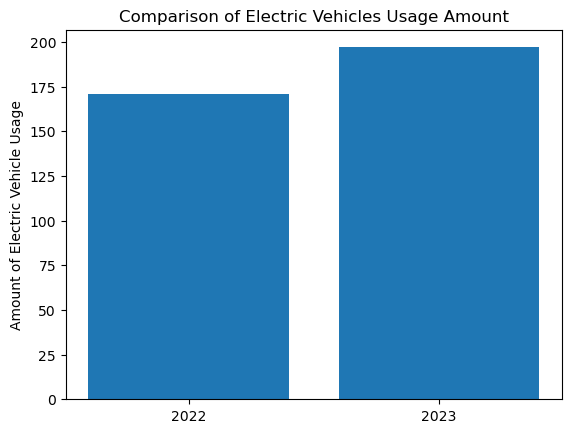

In [32]:
data22 = pd.read_csv(os.getcwd()+ '/combined_2022date' + '/onlyEV_22.csv')
data23 = pd.read_csv(os.getcwd()+ '/combined_2023date' + '/onlyEV_23.csv')

ev_record22 = data22[(data22['z_type'] =='car') & (data22['z_ev'] =='yes')]
ev_record23 = data23[(data23['z_type'] =='car') & (data23['z_electric'] =='yes')]


sum_ev22 = ((ev_record22['z_type'] == 'car') & (ev_record22['z_ev'] =='yes')).sum()
sum_ev23 = ((ev_record23['z_type'] == 'car') & (ev_record23['z_electric'] =='yes')).sum()


x = np.array(['2022','2023'])
y = np.array([sum_ev22, sum_ev23])

plt.bar(x,y)
plt.ylabel('Amount of Electric Vehicle Usage')
plt.title('Comparison of Electric Vehicles Usage Amount')
plt.show()


## 8.2 Investigate more on gender of ev car drivers

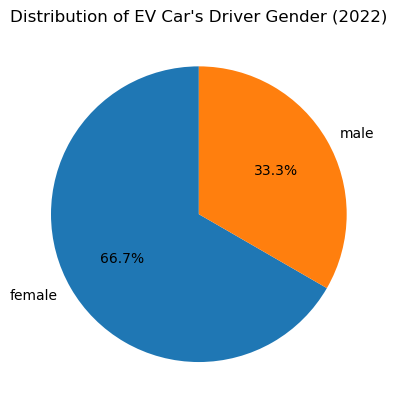

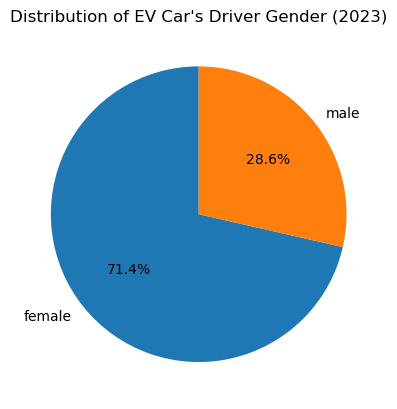

In [33]:
data22 = pd.read_csv(os.getcwd() + '/combined_2022date' + '/onlyEV_22.csv', encoding='utf-8', dtype={'column_name': 'float'})
data23 = pd.read_csv(os.getcwd() + '/combined_2023date' + '/onlyEV_23.csv', encoding='utf-8', dtype={'column_name': 'float'})

ev_record22 = data22[(data22['z_type'] == 'car') & (data22['z_ev'] == 'yes')]
ev_record23 = data23[(data23['z_type'] == 'car') & (data23['z_electric'] == 'yes')]


count_ev22 = ev_record22['z_drivergender'].value_counts()
count_ev23 = ev_record23['z_drivergender'].value_counts()


# Plotting two pie charts for each year
count_ev22.plot.pie(autopct='%1.1f%%', startangle=90, title='Distribution of EV Car\'s Driver Gender (2022)', ylabel = '')
plt.show()

count_ev23.plot.pie(autopct='%1.1f%%', startangle=90, title='Distribution of EV Car\'s Driver Gender (2023)', ylabel = '')
plt.show()

#### The charts above indicate an increase in the utilization of electric cars at the University of Bath from 2022 to 2023. Surprisingly, there are more female drivers than male drivers. Examining the factors that attract men to electric cars might aid in developing marketing strategies in  local Bath area, potentially boosting sales among male customers in the industry.